In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

In [2]:
permutations=np.array(list(itertools.product([0,1], repeat=4)))

In [3]:
print(permutations)

[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]


In [4]:
def factor_function(sigma_i, i_neighbour, i_neighbour2, sigma_j, j_neighbour, j_neighbour2, permutation, d):
    final = 1
    first_neighbours = [sigma_j, i_neighbour, i_neighbour2]
    second_neighbours = [[j_neighbour, j_neighbour2],list(permutation[0:2]),list(permutation[2:4])]
    for idx, j in enumerate(first_neighbours):
        if j==1:
            total = sigma_i + np.sum(first_neighbours) - 1
            for idx2, neighbours in enumerate(second_neighbours):
                if idx2 != idx:
                    total += np.sum(neighbours)
            if total == 0:
                final *= 1
            else:
                final *= 0
        if final == 0:
            return 0
    return final

In [5]:
def BP(d, mu=0, tol=1e-12, max_iter=10000, damping_parameter=0.8, verbose=0, init_psi=None):
    psi=np.zeros((2, 2, 2, 2, 2, 2))
    if init_psi is None:
        psi=np.random.uniform(size=(2, 2, 2, 2, 2, 2))
        psi=psi/np.sum(psi)
    else:
        psi=init_psi.copy()
    
    permutations=np.array(list(itertools.product([0,1], repeat=4)))
    
    for t in range(max_iter):
        psi_new=np.zeros((2, 2, 2, 2, 2, 2))
        for i in range(2):
            for i_neighbour in range(2):
                for i_neighbour2 in range(2):
                    for j in range(2):
                        for j_neighbour in range(2):
                            for j_neighbour2 in range(2):
                                for perm in permutations:
                                    mult=1
                                    if factor_function(i, i_neighbour, i_neighbour2, j, j_neighbour, j_neighbour2, perm, d)==0:
                                        continue
                                    #for _ in range(2): #mudar para degree
                                    mult*=psi[i_neighbour, perm[0], perm[1], i, j, i_neighbour2]
                                    mult*=psi[i_neighbour2, perm[2], perm[3], i, j, i_neighbour]
                                    psi_new[i, i_neighbour, i_neighbour2, j, j_neighbour, j_neighbour2]+=np.exp(mu*i)*mult
                    
        if np.sum(psi_new)!=0:
            psi_new=psi_new/np.sum(psi_new)
        else:
            psi_new=np.ones((2, 2, 2, 2, 2, 2))/64
        
        psi_new=damping_parameter*psi+(1-damping_parameter)*psi_new
        
        Delta=np.linalg.norm(psi_new-psi)
        if verbose==2 and t%100==0:
            print("Iter : ", t+1, " Delta : ", Delta)
        psi=psi_new
        if Delta<tol:
            break
    
    if t==max_iter-1:
        print("No convergence"+" ! Final error: "+ str(Delta))
    else:
        if verbose>=1:
            print("Converged ! Number of iteration "+str(t))
    
    return psi

In [6]:
psi = BP(3, mu=3, verbose=0)

In [7]:
print(psi)

[[[[[[1.01749164e-01 1.01749164e-01]
     [1.01749164e-01 1.01749164e-01]]

    [[3.65460019e-02 3.65460019e-02]
     [3.65460019e-02 3.65460019e-02]]]


   [[[3.40134263e-02 3.24580121e-20]
     [4.24855704e-20 3.88499649e-20]]

    [[3.15517427e-21 3.03008270e-20]
     [3.80920426e-20 2.54534612e-20]]]]



  [[[[3.40134263e-02 3.09261613e-20]
     [3.16203851e-21 3.89437174e-20]]

    [[5.27136026e-20 2.53158450e-20]
     [3.88527351e-20 1.85546241e-20]]]


   [[[2.53934252e-20 1.52323187e-20]
     [5.19266353e-20 3.65148538e-20]]

    [[4.25175421e-20 5.30162418e-20]
     [3.84163397e-20 9.09111039e-21]]]]]




 [[[[[9.46981207e-02 9.46981207e-02]
     [9.46981207e-02 9.46981207e-02]]

    [[1.03907107e-20 4.55318946e-20]
     [3.49744120e-20 1.42224174e-20]]]


   [[[4.40403581e-20 4.33326003e-20]
     [5.33360018e-22 3.70843824e-20]]

    [[3.25234014e-20 3.57259058e-20]
     [3.91137095e-21 1.36519801e-20]]]]



  [[[[3.12534717e-20 1.33191759e-20]
     [3.25036034e-20 1.72607377

In [7]:
def update_observables(psi, mu, d=3):
        phi_=0
        phi__=0

        permutations=np.array(list(itertools.product([0,1], repeat=4)))
        
        numerator=0
        
        for i in range(2):
            for i_neighbour in range(2):
                for i_neighbour2 in range(2):
                    for j in range(2):
                        for j_neighbour in range(2):
                            for j_neighbour2 in range(2):
                                for perm in permutations:
                                    mult=1
                                    if factor_function(i, i_neighbour, i_neighbour2, j, j_neighbour, j_neighbour2, perm, d)==0:
                                        continue
                                    mult*=psi[i_neighbour, perm[0], perm[1], i, j, i_neighbour2]
                                    mult*=psi[i_neighbour2, perm[2], perm[3], i, j, i_neighbour]
                                    mult*=psi[j, j_neighbour, j_neighbour2, i, i_neighbour, i_neighbour2]
                                    phi_+=np.exp(mu*i)*mult
                                    numerator+=i*mult*np.exp(mu*i)
                                    
                                phi__+=psi[i, i_neighbour, i_neighbour2, j, j_neighbour, j_neighbour2]*psi[j, j_neighbour, j_neighbour2, i, i_neighbour, i_neighbour2]

        if phi_==0:
            phi_=1e-16
        if phi__==0:
            phi__=1e-16
        phi=np.log(phi_)-d/2*np.log(phi__)

        if numerator==0:
            rho=0
        else:
            rho=numerator/phi_
            
        s=phi-mu*rho

        return phi, rho, s

In [8]:
mu_space = np.linspace(0, 12, 100)
d = 3
phi_list = []
rho_list = []
s_list = []
for mu in tqdm(mu_space):
    psi = BP(d, mu=mu, verbose=0)
    phi, rho, s = update_observables(psi, mu, d)
    phi_list.append(phi)
    rho_list.append(rho)
    s_list.append(s)

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


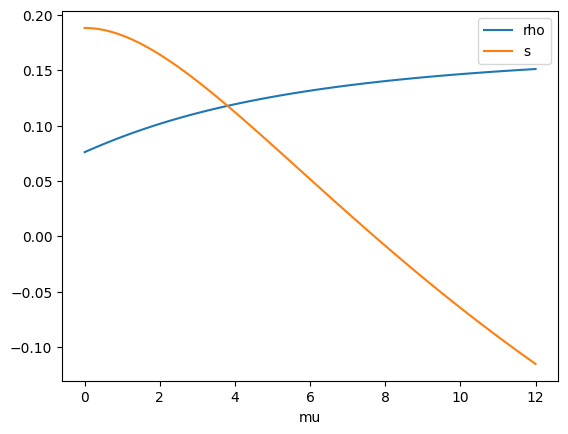

In [9]:
plt.plot(mu_space, rho_list, label='rho')
plt.plot(mu_space, s_list, label='s')
plt.xlabel('mu')
plt.legend()
plt.show()

In [10]:
def find_zero_bisection(arr):
    # Function to find zero using bisection method
    left = 0
    right = len(arr) - 1
    if(arr[left]*arr[right] > 0):
        print("No zero crossing found")
        return -1

    while right - left > 1:
        mid = (left + right) // 2
        if arr[mid] == 0:
            return mid  # Zero found at index 'mid'
        elif arr[mid] * arr[left] < 0:
            right = mid
        else:
            left = mid

    # If exact zero not found, return the index closest to zero
    return left if abs(arr[left]) < abs(arr[right]) else right

In [11]:
def complete_run(d, mu_space, verbose=0, max_iter=100000, damping_parameter=0.8):
    phi_list = []
    rho_list = []
    s_list = []
    for mu in mu_space:
        psi = BP(d, mu=mu, verbose=verbose, max_iter=max_iter, damping_parameter=damping_parameter)
        phi, rho, s = update_observables(psi, mu, d)
        phi_list.append(phi)
        rho_list.append(rho)
        s_list.append(s)

    zero_index = find_zero_bisection(s_list)
    if zero_index == -1:
        return -1
    return rho_list[zero_index]

In [12]:
find_zero_bisection(s_list)
print(rho_list[find_zero_bisection(s_list)])

0.1392459795517515
